In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df=pd.read_csv('Book1.csv')

In [22]:
df.head()

,Date,Price USD per Oz,Price INR per Gm
0,2009-01,857.726,2264.618110
1,2009-02,939.763,2481.216972
2,2009-03,925.989,2444.850056
3,2009-04,892.663,2356.860811
4,2009-05,926.855,2447.136519


In [23]:
df.drop('Price USD per Oz',axis=1,inplace=True)

In [24]:
df.head()

,Date,Price INR per Gm
0,2009-01,2264.618110
1,2009-02,2481.216972
2,2009-03,2444.850056
3,2009-04,2356.860811
4,2009-05,2447.136519


In [25]:
df.isnull().sum()

Date                0
Price INR per Gm    0
dtype: int64

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [30]:
df['year']=pd.to_datetime(df.Date,format="%Y/%m/%d").dt.year
df['month']=pd.to_datetime(df.Date,format="%Y/%m/%d").dt.month

In [31]:
df.head()

,Date,Price INR per Gm,year,month
0,2009-01,2264.618110,2009,1
1,2009-02,2481.216972,2009,2
2,2009-03,2444.850056,2009,3
3,2009-04,2356.860811,2009,4
4,2009-05,2447.136519,2009,5


In [32]:
df.drop('Date',axis=1,inplace=True)

In [33]:
X=df[["year","month"]]
y=df["Price INR per Gm"]

In [34]:
model.fit(X,y)

LinearRegression()

In [35]:
model.predict(X)

array([3324.67193145, 3330.54653576, 3336.42114006, 3342.29574436,
       3348.17034866, 3354.04495296, 3359.91955726, 3365.79416156,
       3371.66876587, 3377.54337017, 3383.41797447, 3389.29257877,
       3354.55661291, 3360.43121721, 3366.30582152, 3372.18042582,
       3378.05503012, 3383.92963442, 3389.80423872, 3395.67884302,
       3401.55344733, 3407.42805163, 3413.30265593, 3419.17726023,
       3384.44129437, 3390.31589867, 3396.19050298, 3402.06510728,
       3407.93971158, 3413.81431588, 3419.68892018, 3425.56352448,
       3431.43812878, 3437.31273309, 3443.18733739, 3449.06194169,
       3414.32597583, 3420.20058013, 3426.07518444, 3431.94978874,
       3437.82439304, 3443.69899734, 3449.57360164, 3455.44820594,
       3461.32281024, 3467.19741455, 3473.07201885, 3478.94662315,
       3444.21065729, 3450.08526159, 3455.95986589, 3461.8344702 ,
       3467.7090745 , 3473.5836788 , 3479.4582831 , 3485.3328874 ,
       3491.2074917 , 3497.08209601, 3502.95670031, 3508.83130

In [36]:
model.score(X,y)

0.03215922510150049

In [41]:
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_error
error=mean_squared_error(y,model.predict(X))

In [18]:
error

306210.76049517095

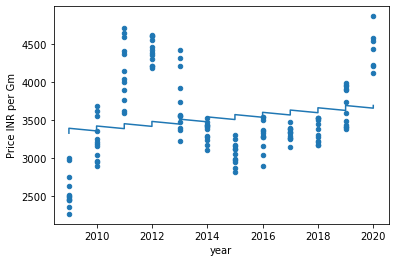

In [40]:
df.plot.scatter(x="year",y="Price INR per Gm")
plt.plot(df['year'],model.predict(X))